# ✅ HTML

- 모든 웹 사이트에는 HTML이 존재한다.
- HTML이란 웹의 구조를 나타내기 위한 언어
- HTML은 태그로 구성되어 있다.

## 🎯 Tag

- HTML 요소는 시작태그와 종료태그 그리고 태그 사이에 위치하는 Content로 구성
- <태그명> Content </태그명>

👉 `<h1> Test </h1>`

## 🎯 Attribute

- 해당 태그 마다 속성이 존재할 수 있는데 이를 Tag의 Attribute 라고 한다.

👉 `<h1 id="title">Test</h1>`

👉 크롤링 하면서 자주 보게 될 태그들
<table>
    <tr>
        <th>태그명</th>
        <th>역할</th>
    </tr>
    <tr>
        <td>div</td>
        <td>구역 나누는 용도</td>
    </tr>
    <tr>
        <td>a</td>
        <td>주로 href가 붙어서 클릭시에 링크로 이동</td>
    </tr>
    <tr>
        <td>h1</td>
        <td>제목</td>
    </tr>
    <tr>
        <td>p</td>
        <td>문단, 글</td>
    </tr>
    <tr>
        <td>ul, li</td>
        <td>문단의 목록, 리스트</td>
    </tr>
</table>

## 🎯 Tag간의 관계

👉 `<div id = "parent">
        <h1 id = "children">Content<h1>
    </div>`
    
- 여기서 `<div>`태그는 부모태그, `<h1>` 태그는 자식태그
- 자식태그는 부모태그안에서 들여쓰기가 되어있다.

---

# ✅ Selenium으로 크롤링하기

## 🎯 사전 준비요소


- Webdriver-Manager 👉 webdriver-manager는 크롬드라이버를 로컬에 설치할 필요 없게 해준다.

- Selenium package 👉 크롤링에 필수적인 파이썬 라이브러리

- Chropath 👉 구글 크롬 확장프로그램, 웹 접근요소에 대한 식별이 쉬워진다.

In [1]:
!pip install webdriver-manager
!pip install selenium


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from selenium import webdriver 
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

🟢 ChroPath 설치 링크
https://chrome.google.com/webstore/detail/chropath/ljngjbnaijcbncmcnjfhigebomdlkcjo

## 🎯 Selenium 기본 명령어

👉 intranet 홈페이지에 자동 로그인하는 간단한 자동화 프로그램을 만들면서 Selenium 기본 명령어에 대해 익혀봅시다.

```
- driver.get("url")
- element.send_keys("String")
- element.click()
```

In [4]:
# 라이브러리 선언 및 intranet url 접속
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://intranet.amkor.co.kr/index.jsp")

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - Driver [C:\Users\suhna\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache
C:\Users\suhna\AppData\Local\Temp\1\ipykernel_23572\1054623113.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


👉 intranet 홈페이지 id, pwd 로그인 칸 요소에 접근하여 본인의 아이디, 비밀번호를 입력하도록 구성해봅시다.

```html
    <input name="input_id" 
        tabindex="1" 
        type="text" 
        size="12" 
        onfocus="this.className='id_focus'" 
        onblur="if ( this.value == '' ){this.className='id_blur'}" 
        class="id_blur" ...>

    <input tabindex="2" 
           type="password" 
           name="input_pwd" 
           size="12" ...>
```        

다음과 같이 생긴 태그가 있다고 가정해봅시다. 어떻게 접근해야 할까요?

In [4]:
id = driver.find_element_by_name('input_id')
# id = driver.find_element_by_xpath('/html/body/table/tbody/tr/td/table/tbody/tr[3]/td[1]/table/tbody/tr[1]/td/div/form/table/tbody/tr[1]/td[1]/table/tbody/tr[2]/td[2]/input')
id.send_keys('skould')

C:\Users\suhna\AppData\Local\Temp\10\ipykernel_14436\161328990.py:1: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  id = driver.find_element_by_name('input_id')


### 📑 Tag attribute(name)로 접근하기

In [6]:
#find_element_by_name으로 접근하기
## send_keys는 키보드 입력
id = driver.find_element(By.NAME, "input_id")
# id = driver.find_element_by_xpath('/html/body/table/tbody/tr/td/table/tbody/tr[3]/td[1]/table/tbody/tr[1]/td/div/form/table/tbody/tr[1]/td[1]/table/tbody/tr[2]/td[2]/input')
id.send_keys('skould')

pwd = driver.find_element(By.NAME,'input_pwd')
pwd.send_keys('nsh0404')

login_btn = driver.find_element(By.XPATH, "/html/body/table/tbody/tr/td/table/tbody/tr[3]/td[1]/table/tbody/tr[1]/td/div/form/table/tbody/tr[1]/td[2]/table/tbody/tr[2]/td/input")
login_btn.click()

In [7]:
login_btn = driver.find_element(By.XPATH, "/html/body/table/tbody/tr/td/table/tbody/tr[3]/td[1]/table/tbody/tr[1]/td/div/form/table/tbody/tr[1]/td[2]/table/tbody/tr[2]/td/input")
login_btn.click()

### 📑 Xpath로 접근하기

- find_element_by_name과 같이 태그 어트리뷰트를 보고 바로 코드로 작성하는 방법도 있지만
- xpath로 경로를 찾는 방법도 존재합니다.
- 순서는 다음과 같습니다.

1. 동작을 수행하려는 페이지에서 키보드 F12번 누릅니다.
<br/><br/>

2. inspector를 클릭 👉 핸들링하려는 요소에 가져다 댑니다.
<br/>

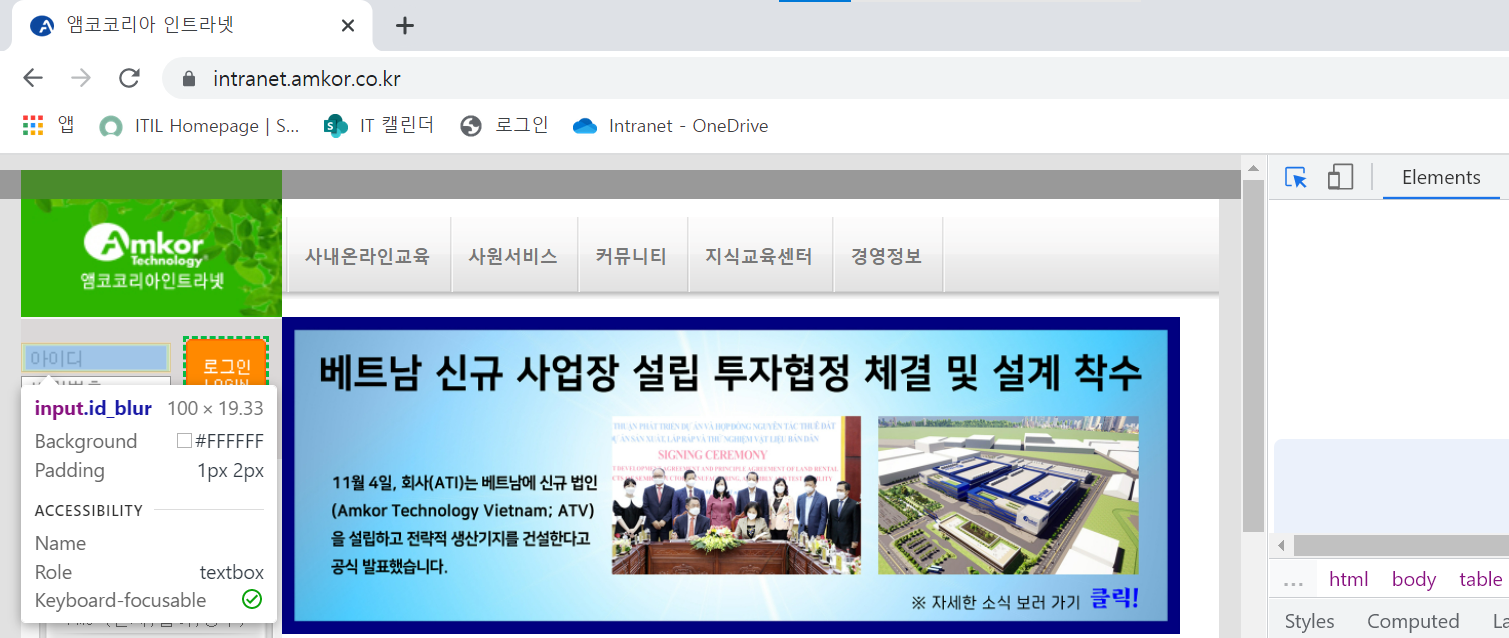
<br/><br/>

3. 그러면 현재 선택된 요소의 HTML이 나타납니다. 👉 그 마우스 오른쪽 클릭하여 Copy 👉 Copy Xpath 클릭 
<br/>

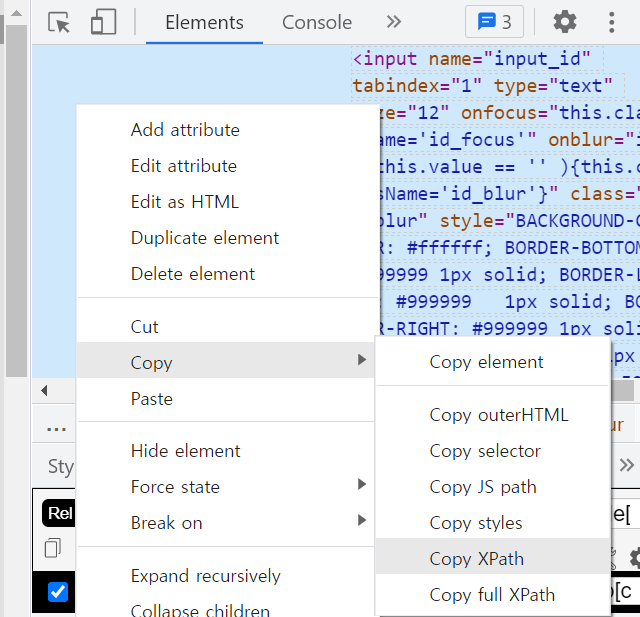
<br/><br/>


4. ChroPath를 이용하여 Xpath가 제대로 요소를 찾는지 확인해봅니다.
<br/>

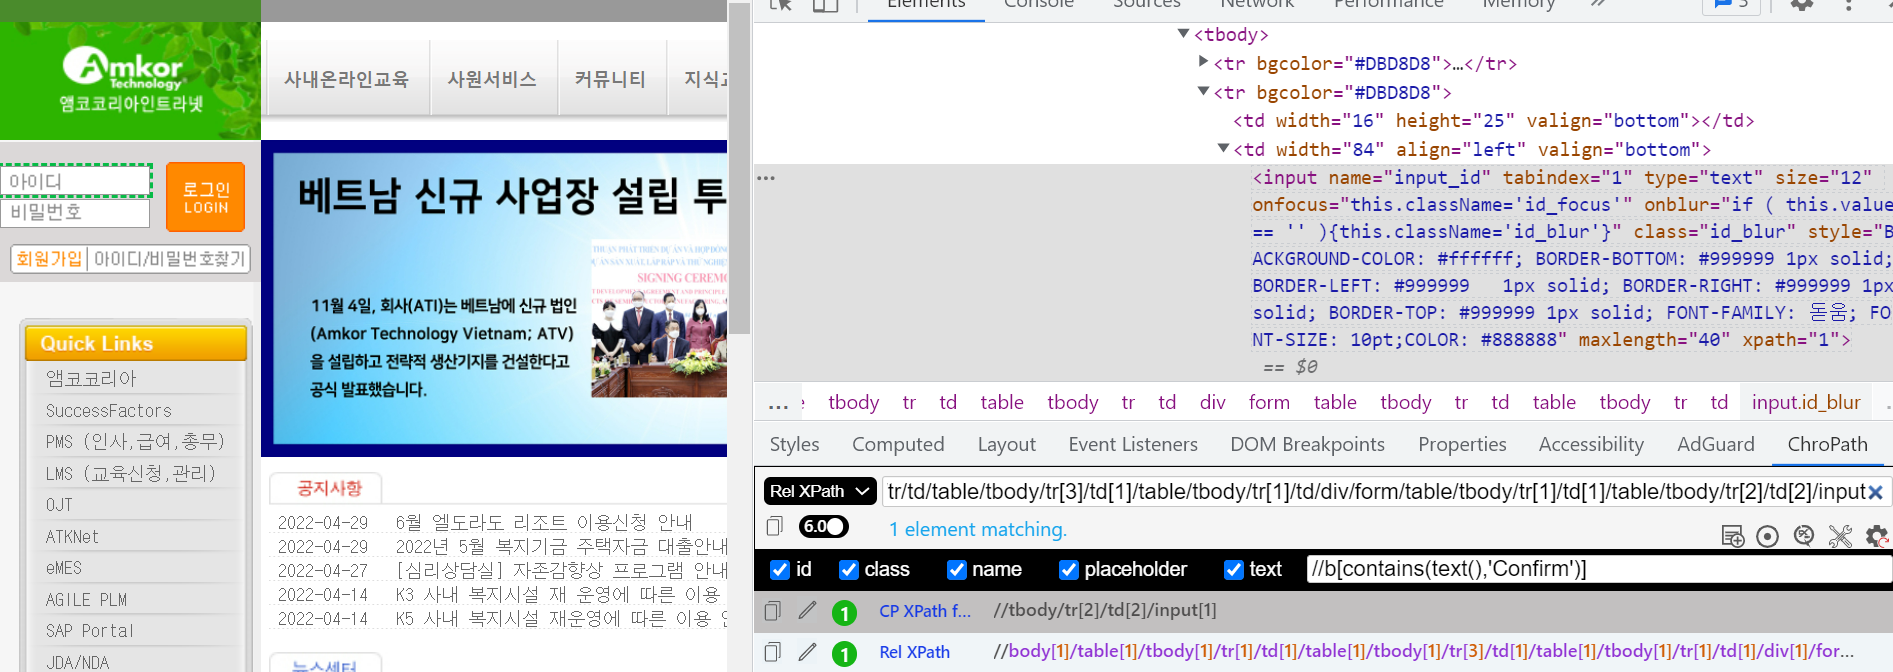

## XPATH 사용 시 문법
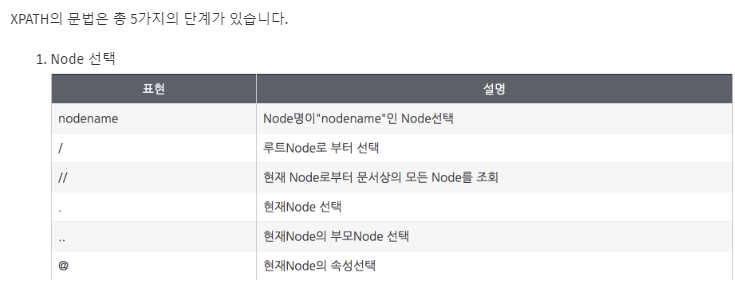

In [16]:
# find_element_by_xpath로 접근하기
id = driver.find_element_by_xpath('//tbody/tr[2]/td[2]/input[1]')
id.send_keys('hisg1201')

pwd = driver.find_element_by_xpath('//tbody/tr[4]/td[2]/input[1]')
pwd.send_keys('h108109h')

📌 name, xpath 외에도 find_element는 종류가 많습니다. 상황에 맞추어 사용하시면 됩니다.
<br/>

#### ❗ python version 높을시
- `find_element_by_xpath` 명령어를 지원하지 않을 수 있습니다.
- 그때는 아래의 형식처럼 명령어 바꿔 써주시면 됩니다.
- 👀 https://selenium-python.readthedocs.io/locating-elements.html

In [1]:
from selenium.webdriver.common.by import By

# 예시
ID = "id"
NAME = "name"
XPATH = "xpath"
LINK_TEXT = "link text"
PARTIAL_LINK_TEXT = "partial link text"
TAG_NAME = "tag name"
CLASS_NAME = "class name"
CSS_SELECTOR = "css selector"

# find_element
find_element(By.ID, "id")
find_element(By.NAME, "name")
find_element(By.XPATH, "xpath")
find_element(By.LINK_TEXT, "link text")
find_element(By.PARTIAL_LINK_TEXT, "partial link text")
find_element(By.TAG_NAME, "tag name")
find_element(By.CLASS_NAME, "class name")
find_element(By.CSS_SELECTOR, "css selector")

NameError: name 'find_element' is not defined

### 📑 요소 클릭하기

👉 이제 intranet id/pwd를 모두 입력했습니다. 로그인 버튼을 찾아 클릭하도록 해봅시다.

In [20]:
#요소를 찾아 자동으로 클릭하기
login_btn = driver.find_element_by_xpath('/html[1]/body[1]/table[1]/tbody[1]/tr[1]/td[1]/table[1]/tbody[1]/tr[3]/td[1]/table[1]/tbody[1]/tr[1]/td[1]/div[1]/form[1]/table[1]/tbody[1]/tr[1]/td[2]/table[1]/tbody[1]/tr[2]/td[1]/input[1]')
login_btn.click()

### 📑 여러 개의 요소를 리스트로 저장하기

👉 빌보드 홈페이지에 접속하여 제일 상단에 있는 일등 곡의 제목을 띄워봅시다.

In [13]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.billboard.com/charts/hot-100/")
title = driver.find_element(By.ID, "section-heading")
title.text

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - Driver [C:\Users\suhna\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache
C:\Users\suhna\AppData\Local\Temp\1\ipykernel_23572\1470266492.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


'Billboard Hot 100'

👉 빌보드 홈페이지에 접속하여 Top List 100개의 곡 제목, 아티스트 이름을 스크랩 해봅시다.

In [9]:
#find_elements_by_xpath
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.billboard.com/charts/hot-100/")

title_list = driver.find_elements_by_xpath("//h3[contains(@class,'c-title  a-no-trucate')]")
artist_list = driver.find_elements_by_xpath("//span[contains(@class,'c-label  a-no-trucate')]")


for i in range(0, len(title_list)):
    print(f"{i+1}. {title_list[i].text} / {artist_list[i].text}")

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - Driver [C:\Users\suhna\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache
C:\Users\suhna\AppData\Local\Temp\1\ipykernel_23572\1155103949.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\suhna\AppData\Local\Temp\1\ipykernel_23572\1155103949.py:8: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  title_list = driver.find_elements_by_xpath("//h3[contains(@class,'c-title  a-no-trucate')]")
C:\Users\suhna\AppData\Local\Temp\1\ipykernel_23572\1155103949.py:9: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  artist_list = driver.find_elements_by_xpa

1. Break My Soul / Beyonce
2. As It Was / Harry Styles
3. About Damn Time / Lizzo
4. Running Up That Hill (A Deal With God) / Kate Bush
5. Staying Alive / DJ Khaled Featuring Drake & Lil Baby
6. Bad Habit / Steve Lacy
7. Wait For U / Future Featuring Drake & Tems
8. Sunroof / Nicky Youre & dazy
9. First Class / Jack Harlow
10. Bad Decisions / benny blanco, BTS & Snoop Dogg
11. Me Porto Bonito / Bad Bunny & Chencho Corleone
12. Late Night Talking / Harry Styles
13. I Like You (A Happier Song) / Post Malone Featuring Doja Cat
14. Heat Waves / Glass Animals
15. The Kind Of Love We Make / Luke Combs
16. Titi Me Pregunto / Bad Bunny
17. Wasted On You / Morgan Wallen
18. You Proof / Morgan Wallen
19. I Ain't Worried / OneRepublic
20. Stay / The Kid LAROI & Justin Bieber
21. Big Energy / Latto
22. She Had Me At Heads Carolina / Cole Swindell
23. Jimmy Cooks / Drake Featuring 21 Savage
24. Glimpse Of Us / Joji
25. Ghost / Justin Bieber
26. Moscow Mule / Bad Bunny
27. Numb Little Bug / Em Beiho

In [27]:

    
aa = driver.find_elements(By.XPATH, "//h3[contains(@class,'c-title  a-no-trucate')]"))
for xx in aa:
    print(xx.text)


WebDriverException: Message: chrome not reachable
  (Session info: chrome=104.0.5112.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x00C478B3+2193587]
	Ordinal0 [0x00BE0681+1771137]
	Ordinal0 [0x00AF4070+802928]
	Ordinal0 [0x00AE9AB2+760498]
	Ordinal0 [0x00ADCEAF+708271]
	Ordinal0 [0x00AE1142+725314]
	Ordinal0 [0x00AE55C9+742857]
	Ordinal0 [0x00AF5500+808192]
	Ordinal0 [0x00B4D2C2+1168066]
	Ordinal0 [0x00B3D5C6+1103302]
	Ordinal0 [0x00B177E0+948192]
	Ordinal0 [0x00B186E6+952038]
	GetHandleVerifier [0x00EF0CB2+2738370]
	GetHandleVerifier [0x00EE21B8+2678216]
	GetHandleVerifier [0x00CD17AA+512954]
	GetHandleVerifier [0x00CD0856+509030]
	Ordinal0 [0x00BE743B+1799227]
	Ordinal0 [0x00BEBB68+1817448]
	Ordinal0 [0x00BEBC55+1817685]
	Ordinal0 [0x00BF5230+1856048]
	BaseThreadInitThunk [0x75E86739+25]
	RtlGetFullPathName_UEx [0x77008FEF+1215]
	RtlGetFullPathName_UEx [0x77008FBD+1165]


In [30]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.naver.com")

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - Driver [C:\Users\suhna\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache
C:\Users\suhna\AppData\Local\Temp\1\ipykernel_23572\1019160615.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [31]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="e0447aa905ab6c35a3ff368ed515cc7b")>

## ⏺ 웹 크롤링 실습 - 네이버 뉴스 기사

- 네이버에 앰코코리아를 검색하고
- 뉴스기사 제목, 본문, 날짜, 언론사를 스크랩하여 엑셀로 저장해봅시다.

In [14]:
inputbtn = driver.find_element(By.ID,"search_btn")
inputbtn.click()

In [1]:
# 앰코코리아 검색하고 Search 버튼 클릭하기
# driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%95%B0%EC%BD%94%EC%BD%94%EB%A6%AC%EC%95%84")
# 바로 접근할 수 있지만 교육상의 목적으로 이렇게 구성했습니다.
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By


driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.naver.com")

searchBox = driver.find_element_by_xpath("//input[@id='query']")
searchBox.send_keys("앰코코리아")

searchBtn = driver.find_element_by_xpath("//*[@id='search_btn']/span[2]")
searchBtn.click()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - Driver [C:\Users\suhna\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\2634238511.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\2634238511.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  searchBox = driver.find_element_by_xpath("//input[@id='query']")
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\2634238511.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  searchBtn = driver.find_element_by_xpath("//*[@id='search_btn']/span[2]")


In [3]:
searchBox = driver.find_element(By.XPATH,"//input[@id='query']")
searchBox.send_keys("앰코코리아")

In [5]:
searchBox = driver.find_element(By.ID,"query")
searchBox.send_keys("앰코코리아")

In [3]:
searchBtn = driver.find_element(By.ID,"search_btn")
searchBtn.click()

In [10]:
for xx in range(4):
    date_list = driver.find_element(By.XPATH,f"//*[@id='sp_nws_all{xx+1}']/div/div/div[2]/div/a")
    print(date_list.text)
    

헨켈 송도 신사업장에서 생산할 접착제와 어셈블리 등은 인천경제자유구역에 입주한 앰코테크놀러지코리아, 스테츠칩팩코리아 등과 연계되면서 긴밀한 협업관계를 맺게 될 전망이다. 독일에 본사를 두고 있는 헨켈은...
투자협약에서 투자 성사 및 무산 과정 전반 되돌아봐야 광주시 소송 100여건…사업 지연, 행정 낭비 등 부작용 강기정 광주시장은 지난 28일, 세계 최대규모 반도체 업체인 테크놀로지()의 광주 투자...
협약에서 실제 투자 성사·무산 과정 전반 돌아봐야 강기정 광주시장은 28일 앰코테크놀로지코리아(앰코코리아)의 광주 투자 무산과 관련해 "투자 협약이 어떻게 이뤄지고, 실제 투자가 성사되는지 전반적으로 돌아봐야...
앰코테크놀로지코리아 CI로고 앰코테크놀로지코리아(이하 앰코코리아)가 올해 제조직, 제조 장비직 분야 신입 사원 900여명을 채용한다고 27일 밝혔다. 이번 채용은 ▲5G 스마트폰 ▲자율주행 자동차 ▲데이터 센터 및...


In [11]:
title_list = driver.find_elements(By.CLASS_NAME,'news_tit')
for xx in title_list:
    print(xx.text)

헨켈코리아 송도 신사업장 준공
강기정 광주시장 “앰코코리아 3200억 투자 무산 안타까워”
강기정 광주시장 "앰코코리아 3천200억 투자 무산 안타까워"
앰코코리아, 2022년 제조 분야 등 대규모 채용 진행
앰코코리아, 반도체 패키징 시장 확대 대응 신입사원 대규모 채용


In [20]:
#제목, 본문, 날짜, 언론사 리스트 스크랩하기

title_list = driver.find_elements(By.CLASS_NAME,'news_tit')
body_list = driver.find_elements(By.XPATH,"//a[@class='api_txt_lines dsc_txt_wrap']")
date_list = driver.find_elements(By.XPATH,"//span[@class='info']")
press_list = driver.find_elements(By.XPATH,"//a[@class='info press']")

#text로 변환
title_list = [title.text for title in title_list]
body_list = [body.text for body in body_list]
press_list = [press.text for press in press_list]

## date_list에는 현재 다른 정보도 들어가 있으므로 filter 해주어야 한다.
date_list = [date.text for date in date_list if "면" and "단" not in date.text ]
date_list

['20시간 전', '8시간 전', '2022.07.30.', '2022.07.28.']

In [36]:
title_list2 = driver.find_elements(By.CLASS_NAME,'news_tit')
for xx in title_list2 :
    print(xx.text)

헨켈코리아 송도 신사업장 준공
강기정 광주시장 “앰코코리아 3200억 투자 무산 안타까워”
강기정 광주시장 "앰코코리아 3천200억 투자 무산 안타까워"
앰코코리아, 2022년 제조 분야 등 대규모 채용 진행
앰코코리아, 반도체 패키징 시장 확대 대응 신입사원 대규모 채용


In [27]:
# dataframe으로 정의하기
# to_excel 파일로 변환하기

import pandas as pd

news_df = pd.DataFrame({
                        "제목": title_list, 
                        "기사본문":body_list, 
                        "날짜":date_list,
                        "언론사":press_list
                        })

news_df.to_excel("data/네이버뉴스크롤링result_S.xlsx", index=False)

time.sleep(2)

NameError: name 'time' is not defined

## ➕ 유용한 Selenium 함수 or 라이브러리

### 📑 WebDriverWait 👉 지정한 요소가 로드될때까지 대기

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

url = "http://pms.amkor.co.kr/"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url);

# ID BOX, PWD BOX, LOGIN BTN 로드될때까지 최대 10초 대기한다.
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'loginId')))
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'password')))
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'login_btn')))

# ID_box = driver.find_element_by_name("loginId")
# PWD_box = driver.find_element_by_name("password")
driver.execute_script("login()")

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST driver version for 102.0.5005
[WDM] - Driver [C:\Users\20605\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


### 📑 driver.execute_script 👉 HTML 상의 스크립트를 실행해준다.

In [90]:
#HTML에 존재하는 JavaScript를 실행해준다.
driver.execute_script("login()")

### 📑 Keys 라이브러리

In [4]:
# 키보드에 키를 입력하는 동작을 할 수 있다. (로그인 엔터 등등..)
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

url = "http://pms.amkor.co.kr/"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url);

driver.find_element_by_name("password").send_keys(Keys.RETURN)

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 101.0.4951
[WDM] - Get LATEST driver version for 101.0.4951
[WDM] - Driver [C:\Users\20605\.wdm\drivers\chromedriver\win32\101.0.4951.41\chromedriver.exe] found in cache


### 📑 driver.switch_to.frame() 👉 웹사이트가 여러개의 프레임으로 이루어져있을때

- 예를 들면 인트라넷의 식단표 같은 경우 요소에 접근하려면 프레임 안으로 들어가야 합니다.
- 이때 사용하는게 driver.switch_to.frame()

In [15]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
# 인트라넷에서 식단표 가져오기
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://intranet.amkor.co.kr/index.jsp")

# 1. iframe을 찾는다.
# iframe = driver.find_element_by_xpath('/html/body/table/tbody/tr/td/table/tbody/tr[3]/td[2]/table/tbody/tr[2]/td/table/tbody/tr/td[1]/table/tbody/tr[6]/td/table/tbody/tr[1]/td/table/tbody/tr[2]/td/table/tbody/tr/td/iframe')
iframe = driver.find_element_by_xpath('//tbody/tr[1]/td[1]/iframe[1]')

# 2. iframe에 들어가기
driver.switch_to.frame(iframe)
# driver.switch_to.default_content() << iframe에 들어가기 전 원래 html 코드로 원복.

# 3. 원하는 elem 찾기.
typeK = driver.find_element_by_xpath('/html/body/form/div/div[3]/div[2]/div[2]/div/div[2]/table/tbody/tr[1]/td[3]')
typeJ = driver.find_element_by_xpath('/html[1]/body[1]/form[1]/div[1]/div[3]/div[2]/div[2]/div[1]/div[2]/table[1]/tbody[1]/tr[2]/td[2]')
typeC = driver.find_element_by_xpath('//*[@id="div-tabpanel-content-K5"]/table/tbody/tr[3]/td[2]')
plus = driver.find_element_by_xpath('//*[@id="div-tabpanel-content-K5"]/table/tbody/tr[4]/td[2]')

# 4. elem에 대한 text 추출
print(f"한식\n{typeK.text}\n\n일품식\n{typeJ.text}\n\n간편식\n{typeC.text}\n\n추가\n{plus.text}")

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - Driver [C:\Users\suhna\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\566057314.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


한식
미역국(中)
후랑크소시지볶음
파프리카 감자채볶음
열무된장나물
겉절이김치
잡곡밥

일품식
<분식>
떡볶이&김말이튀김
후리가케밥
다시마무국
겉절이김치

간편식


추가



C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\566057314.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  iframe = driver.find_element_by_xpath('//tbody/tr[1]/td[1]/iframe[1]')
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\566057314.py:16: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  typeK = driver.find_element_by_xpath('/html/body/form/div/div[3]/div[2]/div[2]/div/div[2]/table/tbody/tr[1]/td[3]')
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\566057314.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  typeJ = driver.find_element_by_xpath('/html[1]/body[1]/form[1]/div[1]/div[3]/div[2]/div[2]/div[1]/div[2]/table[1]/tbody[1]/tr[2]/td[2]')
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\566057314.py:18: DeprecationWarning: find_element_by_xpath is deprecate

In [17]:
iframes = driver.find_elements_by_css_selector('iframe')
iframes

C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\911639071.py:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  iframes = driver.find_elements_by_css_selector('iframe')


[<selenium.webdriver.remote.webelement.WebElement (session="c4ef88625c47feda6fb434691058c42f", element="61ff0d73-a601-427a-b18b-d8924cd239a9")>]

---

# ✅ BS4 소개 및 학습

## 🎯 Beautiful Soup란?

- HTML 분석을 위해 만들어진 파이썬 라이브러리

In [ ]:
!pip install beautifulsoup4

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
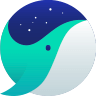
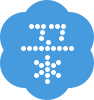

In [19]:
# naver의 HTML 정보를 가져온다.

# !pip install webdriver-manager

import requests
from bs4 import BeautifulSoup

response = requests.get("https://www.naver.com")
html = response.text
soup = BeautifulSoup(html,'html.parser')
print(soup.prettify())
print(type(soup))

## 🎯 BS4 응용

👉 아래와 같은 HTML 구조로 이루어져 있는 웹사이트가 있다고 가정하고, BS4를 이용해 분석해봅시다.

In [20]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""

In [21]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_doc,'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [24]:
soup.title.text # title tag를 가져옴

"The Dormouse's story"

In [41]:
soup.title.string # title tag 사이의 값을 가져옴

"The Dormouse's story"

In [42]:
soup.title.parent.name # title의 상위 tag값을 가져옴

'head'

In [43]:
soup.p.string # 첫번째 p tag를 가져옴

"The Dormouse's story"

In [28]:
soup.a # 첫번째 a tag를 가져옴

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

### 📑 select

📌 `select(요소)` 에서 요소에 들어가는 형식과 의미는 다음과 같습니다.

```
- 태그이름 👉 태그이름으로 찾음 => soup.select('p')

- .클래스이름 👉	클래스이름으로 찾음 => soup.select('.class')

- #아이디이름 👉	아이디이름으로 찾음 (아이디는 연속X) => soup.select('#id')

- 상위태그이름>자식태그>자식태그 👉 부모 자식간의 태그 조회' >' 로 구분 => soup.select('parent>child>tag')

- [속성] 👉 태그 안의 속성을 찾음 => soup.select('a[href="http://example.com/elsie"]')

- 태그이름.클래스이름 👉 해당태그의 클래스이름을 찾음

- #아이디이름 > 태그이름.클래스이름 👉 아이이디 이름으로 찾고 자식태그와 클래스이름으로 찾음
```

In [12]:
# soup.select('a') # tag가 'p' 인 것들을 모두 가져온다.
soup.select('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [31]:
# soup.find_all('a') # tag가 'a'인 것들을 모두 가져온다.
soup.select('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [32]:
# get all a and b tag
soup.find_all(["a", "b","p"]) 
# soup.select('a')

[<p class="title"><b>The Dormouse's story</b></p>,
 <b>The Dormouse's story</b>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>,
 <p class="story">...</p>]

In [7]:
#id=link1인 모든 태그 찾기
# print(soup.find(id='link1'))
print(soup.select("#link1"))

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]


In [8]:
# get title tag 
print(soup.select("title")) 

[<title>The Dormouse's story</title>]


In [9]:
# all a tag inside body 
print(soup.select("body a")) 

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [10]:
# get all title inside head of html 
print(soup.select("html head title")) 

[<title>The Dormouse's story</title>]


In [26]:
# head->title 
print(soup.select("head > title")) 

[<title>The Dormouse's story</title>]


In [120]:
# all a tag that inside p 
print(soup.select("p > a")) 
a = soup.select("p > a")
print(type(a))

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]
<class 'bs4.element.ResultSet'>


In [121]:
# all a tag inside body 
print(soup.select("body > a"))

[]


In [28]:
# select by class 
print(soup.select(".sister")) 

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [123]:
# select by id 
print(soup.select("#link1")) 

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]


In [124]:
print(soup.select('a[href="http://example.com/elsie"]')) 

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]


In [125]:
# find tags by attribute value 
print(soup.select('a[href^="http://example.com/"]')) 

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


### 📑 find

- 태그 이름만 특정 👉 `soup.find('p')`
- 태그 속성으로 특정 👉 `soup.find(class_='youngone')` or `soup.find(attrs = {'class':'youngone'})`
- 태그 이름과 속성 모두 조건 👉 `soup.find('p', class_='youngone')`

In [27]:
soup.find_all('p') # find all p tag

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [29]:
type(soup.find_all('a'))

bs4.element.ResultSet

In [29]:
for link in soup.find_all('a'):
    print(link.text)
    

Elsie
Lacie
Tillie


In [30]:
print(soup.get_text())


The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [34]:
#인트라넷 title 가져오기
import requests
url = "https://intranet.amkor.co.kr/"
html = requests.get(url).text
# print(html)
soup = BeautifulSoup(html, 'html.parser')
# print(soup.prettify())
# soup.title
# soup.select('title')
soup.find('title').text

'앰코코리아 인트라넷'

### ⏺ 실습: 네이버 오늘 읽을만한 글 메뉴 텍스트 가져오기
- 네이버에서 아래 메뉴 텍스트를 BS4를 이용하여 가져와 봅시다.
- 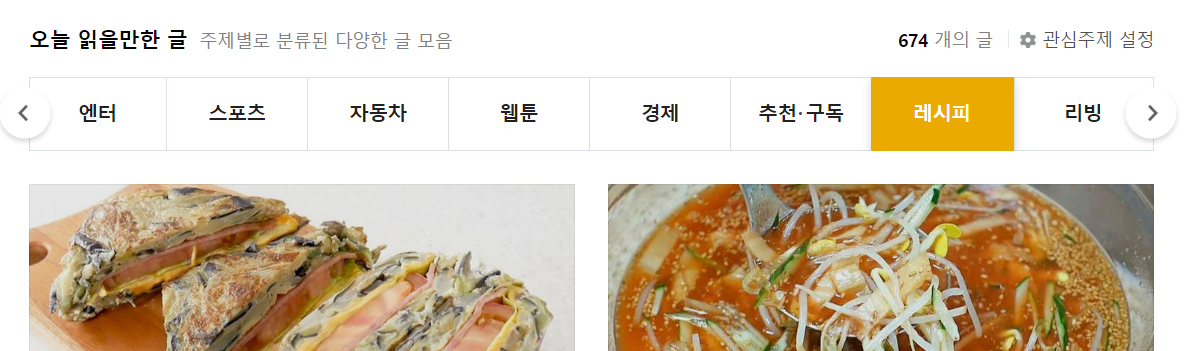

In [36]:
#
from bs4 import BeautifulSoup
import requests

# xml - tree 구조를 가지고 있는 file을 표시하기 위한 언어, extenxible markup language
url = "https://www.naver.com"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

td = soup.select('._NM_THEME_CATE')
for i in td:
    print(i.text)

엔터
스포츠
자동차
웹툰
경제
추천구독
레시피
리빙
책방
패션뷰티


In [38]:
td = soup.select('.category_item')
for i in td:
    print(i.text.replace('\n',''))

엔터
스포츠
자동차
웹툰
경제
추천구독
레시피
리빙
책방
패션뷰티


In [ ]:
input("구월동")

### ⏺ 실습: beautifulsoup 적용

- 동을 입력하면 해당하는 동의 날씨를 출력해보자.
- 아래 동그라미 친 부분을 출력한다.
- 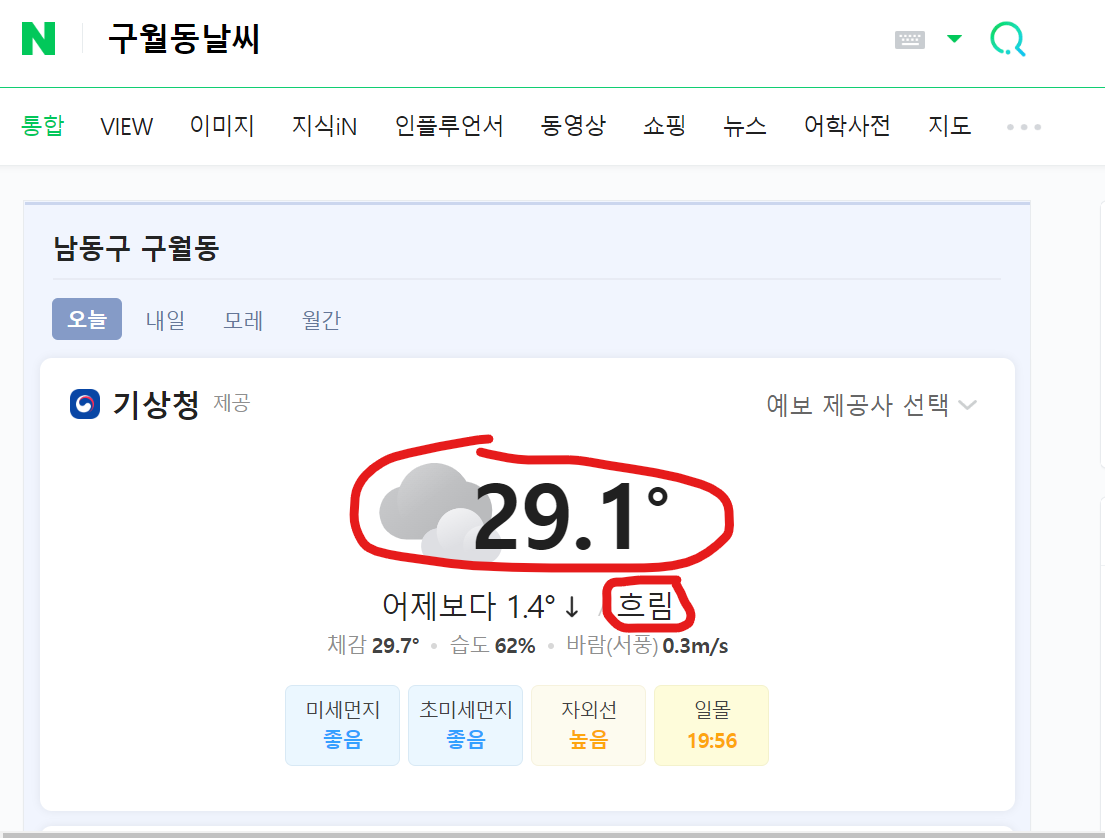
- 실행결과 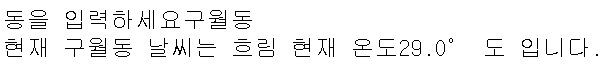

In [75]:
a = soup.select('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(1) > div > div.weather_info > div > div._today > div.weather_graphic > div.temperature_text > strong')
print(a[0])


<strong><span class="blind">현재 온도</span>25.6<span class="celsius">°</span></strong>


In [76]:
# 네이버 실시간 날씨
import requests # 사이트의 webpage 문서를 back ground 에서 down할 수 있도록
from bs4 import BeautifulSoup
location = input("동을 입력하세요 -> ")
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=" + location + " 날씨"
# url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=" + '구월' + " 날씨"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

# print(soup.prettify())
# soup.find('span', class_='weather before_slash').text

# print('현재 ' + location + ' 날씨는 ' 
#       +soup.find('span', class_='weather before_slash').text
#       + soup.find('div', class_ ='temperature_text').text
#       + '도 입니다.')
#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(1) > div > div.weather_info > div > div._today > div.weather_graphic > div.temperature_text > strong
print(soup.select('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(1) > div > div.weather_info > div > div._today > div.weather_graphic > div.temperature_text > strong')[0].text)
print(soup.select('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(1) > div > div.weather_info > div > div._today > div.temperature_info > p > span.weather.before_slash')[0].text)

동을 입력하세요 -> 양동
현재 온도25.6°
흐림


In [70]:
soup.select('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(1) > div > div.weather_info > div > div._today > div.weather_graphic > div.temperature_text > strong')[0].text

'현재 온도25.6°'

In [77]:
#Selenium 라이브러리로 해보기
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
driver = webdriver.Chrome(ChromeDriverManager().install())
location = input("동을 입력하세요")
driver.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query="+ location +"날씨")
temper = driver.find_element_by_xpath("/html/body/div[3]/div[2]/div/div[1]/section[1]/div[1]/div[2]/div[1]/div[1]/div/div[2]/div/div[1]/div[1]/div[2]")
weather = driver.find_element_by_xpath("//span[@class='weather before_slash']")

print(f"현재{location} 날씨는 {weather.text} {temper.text}입니다.")

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - Driver [C:\Users\suhna\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\1454140158.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


동을 입력하세요구월동
현재구월동 날씨는 흐림 현재 온도
26.7°입니다.


C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\1454140158.py:7: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  temper = driver.find_element_by_xpath("/html/body/div[3]/div[2]/div/div[1]/section[1]/div[1]/div[2]/div[1]/div[1]/div/div[2]/div/div[1]/div[1]/div[2]")
C:\Users\suhna\AppData\Local\Temp\2\ipykernel_2760\1454140158.py:8: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  weather = driver.find_element_by_xpath("//span[@class='weather before_slash']")
